In [1]:
import sys
import os

# create a path that points to the parent directory of the current directory
module_path = os.path.abspath(os.path.join('..'))

# check if the absolute path of the parent directory has been added to the system module search path
if module_path not in sys.path:
    sys.path.append(module_path)

os.chdir(module_path)

# Imports

In [44]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

from firststeps import FirstSteps as fs

In [3]:
fs.jupyter_settings()

pd.options.display.float_format = '{:.0f}'.format

# Load data

In [26]:
df = pd.concat(map(pd.read_csv, [
    '/mnt/c/Users/ivero/OneDrive/projetos/deteccao_de_anomalias/data/AEP_hourly.csv', 
    '/mnt/c/Users/ivero/OneDrive/projetos/deteccao_de_anomalias/data/COMED_hourly.csv',
    '/mnt/c/Users/ivero/OneDrive/projetos/deteccao_de_anomalias/data/DAYTON_hourly.csv',
    '/mnt/c/Users/ivero/OneDrive/projetos/deteccao_de_anomalias/data/DEOK_hourly.csv',
    '/mnt/c/Users/ivero/OneDrive/projetos/deteccao_de_anomalias/data/DOM_hourly.csv',
    '/mnt/c/Users/ivero/OneDrive/projetos/deteccao_de_anomalias/data/DUQ_hourly.csv',
    '/mnt/c/Users/ivero/OneDrive/projetos/deteccao_de_anomalias/data/EKPC_hourly.csv',
    '/mnt/c/Users/ivero/OneDrive/projetos/deteccao_de_anomalias/data/FE_hourly.csv',
    '/mnt/c/Users/ivero/OneDrive/projetos/deteccao_de_anomalias/data/NI_hourly.csv',
    '/mnt/c/Users/ivero/OneDrive/projetos/deteccao_de_anomalias/data/PJME_hourly.csv',
    '/mnt/c/Users/ivero/OneDrive/projetos/deteccao_de_anomalias/data/PJMW_hourly.csv'
]), ignore_index=True)

df.head()

,Datetime,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJME_MW,PJMW_MW
0,2004-12-31 01:00:00,13478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-12-31 02:00:00,12865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-12-31 03:00:00,12577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-12-31 04:00:00,12517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-12-31 05:00:00,12670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [27]:
fs.type_na(df)

,features,type,soma_nulos,perc_nulos
0,Datetime,object,0,0
1,AEP_MW,float64,935998,1
2,COMED_MW,float64,990774,1
3,DAYTON_MW,float64,935996,1
4,DEOK_MW,float64,999532,1
5,DOM_MW,float64,941082,1
6,DUQ_MW,float64,938203,1
7,EKPC_MW,float64,1011937,1
8,FE_MW,float64,994397,1
9,NI_MW,float64,998821,1


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057271 entries, 0 to 1057270
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Datetime   1057271 non-null  object 
 1   AEP_MW     121273 non-null   float64
 2   COMED_MW   66497 non-null    float64
 3   DAYTON_MW  121275 non-null   float64
 4   DEOK_MW    57739 non-null    float64
 5   DOM_MW     116189 non-null   float64
 6   DUQ_MW     119068 non-null   float64
 7   EKPC_MW    45334 non-null    float64
 8   FE_MW      62874 non-null    float64
 9   NI_MW      58450 non-null    float64
 10  PJME_MW    145366 non-null   float64
 11  PJMW_MW    143206 non-null   float64
dtypes: float64(11), object(1)
memory usage: 96.8+ MB
None


In [29]:
# organize data by date
df.set_index("Datetime")

,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJME_MW,PJMW_MW
Datetime,,,,,,,,,,,
2004-12-31 01:00:00,13478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31 02:00:00,12865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31 03:00:00,12577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31 04:00:00,12517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31 05:00:00,12670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8401
2018-01-01 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8373
2018-01-01 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8238


In [30]:
# combine seperate company power data columns into one
df['MW'] = pd.concat([df['AEP_MW'], df['COMED_MW'], df['DAYTON_MW'], df['DEOK_MW'], df['DOM_MW'], df['DUQ_MW'], df['EKPC_MW'], df['FE_MW'], df['NI_MW'], df['PJME_MW'], df['PJMW_MW']], ignore_index=True)
df.drop(['AEP_MW', 'COMED_MW', 'DAYTON_MW', 'DEOK_MW', 'DOM_MW', 'DUQ_MW', 'EKPC_MW', 'FE_MW', 'NI_MW', 'PJME_MW', 'PJMW_MW'], axis=1, inplace=True)

In [31]:
df.head()

,Datetime,MW
0,2004-12-31 01:00:00,13478
1,2004-12-31 02:00:00,12865
2,2004-12-31 03:00:00,12577
3,2004-12-31 04:00:00,12517
4,2004-12-31 05:00:00,12670


In [32]:
# create a new index based on hours from year 0
df['hoursSince0'] = df['Datetime'].apply(lambda i: (int(i.split(' ')[0].split('-')[0])*365.2422 + int(i.split(' ')[0].split('-')[2]))*24 + int(i.split(' ')[1].split(':')[0]))
df = df.set_index('hoursSince0').reset_index()

In [33]:
# delete null values
df = df.dropna()

# chance columns name
df = df.rename(columns={'Datetime':'datetime', 'MW': 'consumo'})

In [34]:
df.head()

,hoursSince0,datetime,consumo
0,17567434,2004-12-31 01:00:00,13478
1,17567435,2004-12-31 02:00:00,12865
2,17567436,2004-12-31 03:00:00,12577
3,17567437,2004-12-31 04:00:00,12517
4,17567438,2004-12-31 05:00:00,12670


In [35]:
df.dtypes

hoursSince0    float64
datetime        object
consumo        float64
dtype: object

In [36]:
df.datetime = pd.to_datetime(df.datetime)

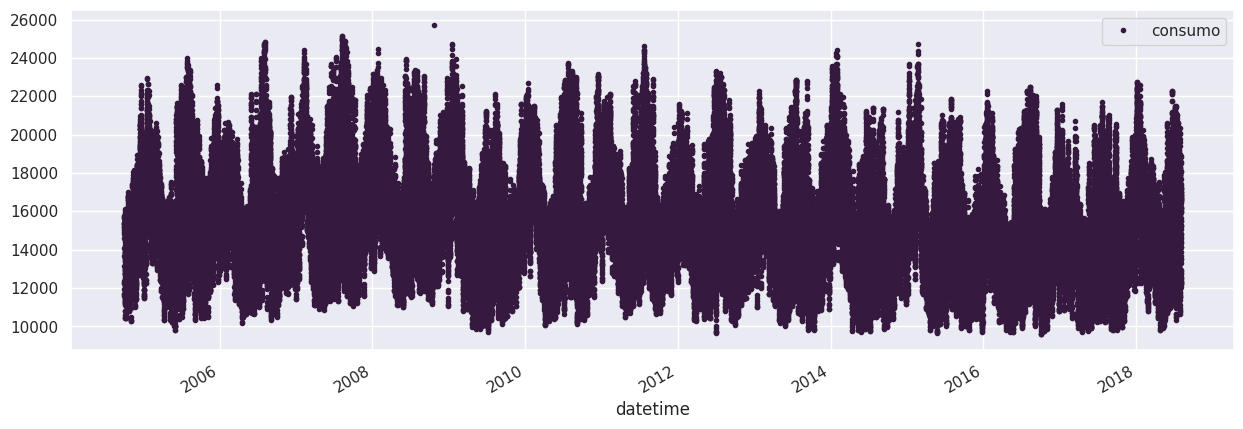

In [37]:
df.plot(style='.', x='datetime', y='consumo', figsize=(15,5));

# Feature Engineering

In [38]:
df1 = df.copy()
df1.head()

,hoursSince0,datetime,consumo
0,17567434,2004-12-31 01:00:00,13478
1,17567435,2004-12-31 02:00:00,12865
2,17567436,2004-12-31 03:00:00,12577
3,17567437,2004-12-31 04:00:00,12517
4,17567438,2004-12-31 05:00:00,12670


In [39]:
df1['date'] = df1.datetime.dt.strftime('%Y-%m-%d')
df1.date = pd.to_datetime(df1.date)
df1['hour'] = df1.datetime.dt.hour.astype(int)
df1['dayofweek'] = df1.datetime.dt.dayofweek.astype(int)
df1['quarter'] = df1.datetime.dt.quarter.astype(int)
df1['month'] = df1.datetime.dt.month.astype(int)
df1['year'] = df1.datetime.dt.year.astype(int)
df1['dayofyear'] = df1.datetime.dt.dayofyear.astype(int)
df1['dayofmonth'] = df1.datetime.dt.day.astype(int)
df1['weekofyear'] = df1.datetime.dt.isocalendar()['week'].astype(int)
df1['weekday'] = (df1.dayofweek <= 5).astype(int)
df1['daylight'] = ((df1.hour > 7) & (df1.hour < 22 )).astype(int)
df1['category'] = (df1.weekday * 2) + df1.daylight

In [40]:
df1.dtypes

hoursSince0           float64
datetime       datetime64[ns]
consumo               float64
date           datetime64[ns]
hour                    int64
dayofweek               int64
quarter                 int64
month                   int64
year                    int64
dayofyear               int64
dayofmonth              int64
weekofyear              int64
dtype: object

In [41]:
fs.num_statistic(df1)

,attributes,count,range,min,25%,50%,75%,max,mean,std,skew,kurtosis
0,hoursSince0,121273,123464,17566713,17601929,17628562,17663230,17690177,17629928,35161,0,-1
1,consumo,121273,16114,9581,13630,15310,17200,25695,15500,2591,0,-0
2,hour,121273,23,0,6,12,18,23,12,7,-0,-1
3,dayofweek,121273,6,0,1,3,5,6,3,2,0,-1
4,quarter,121273,3,1,2,2,4,4,3,1,0,-1
5,month,121273,11,1,4,6,10,12,7,3,0,-1
6,year,121273,14,2004,2008,2011,2015,2018,2011,4,0,-1
7,dayofyear,121273,365,1,91,181,276,366,182,106,0,-1
8,dayofmonth,121273,30,1,8,16,23,31,16,9,0,-1
9,weekofyear,121273,52,1,13,26,40,53,26,15,0,-1


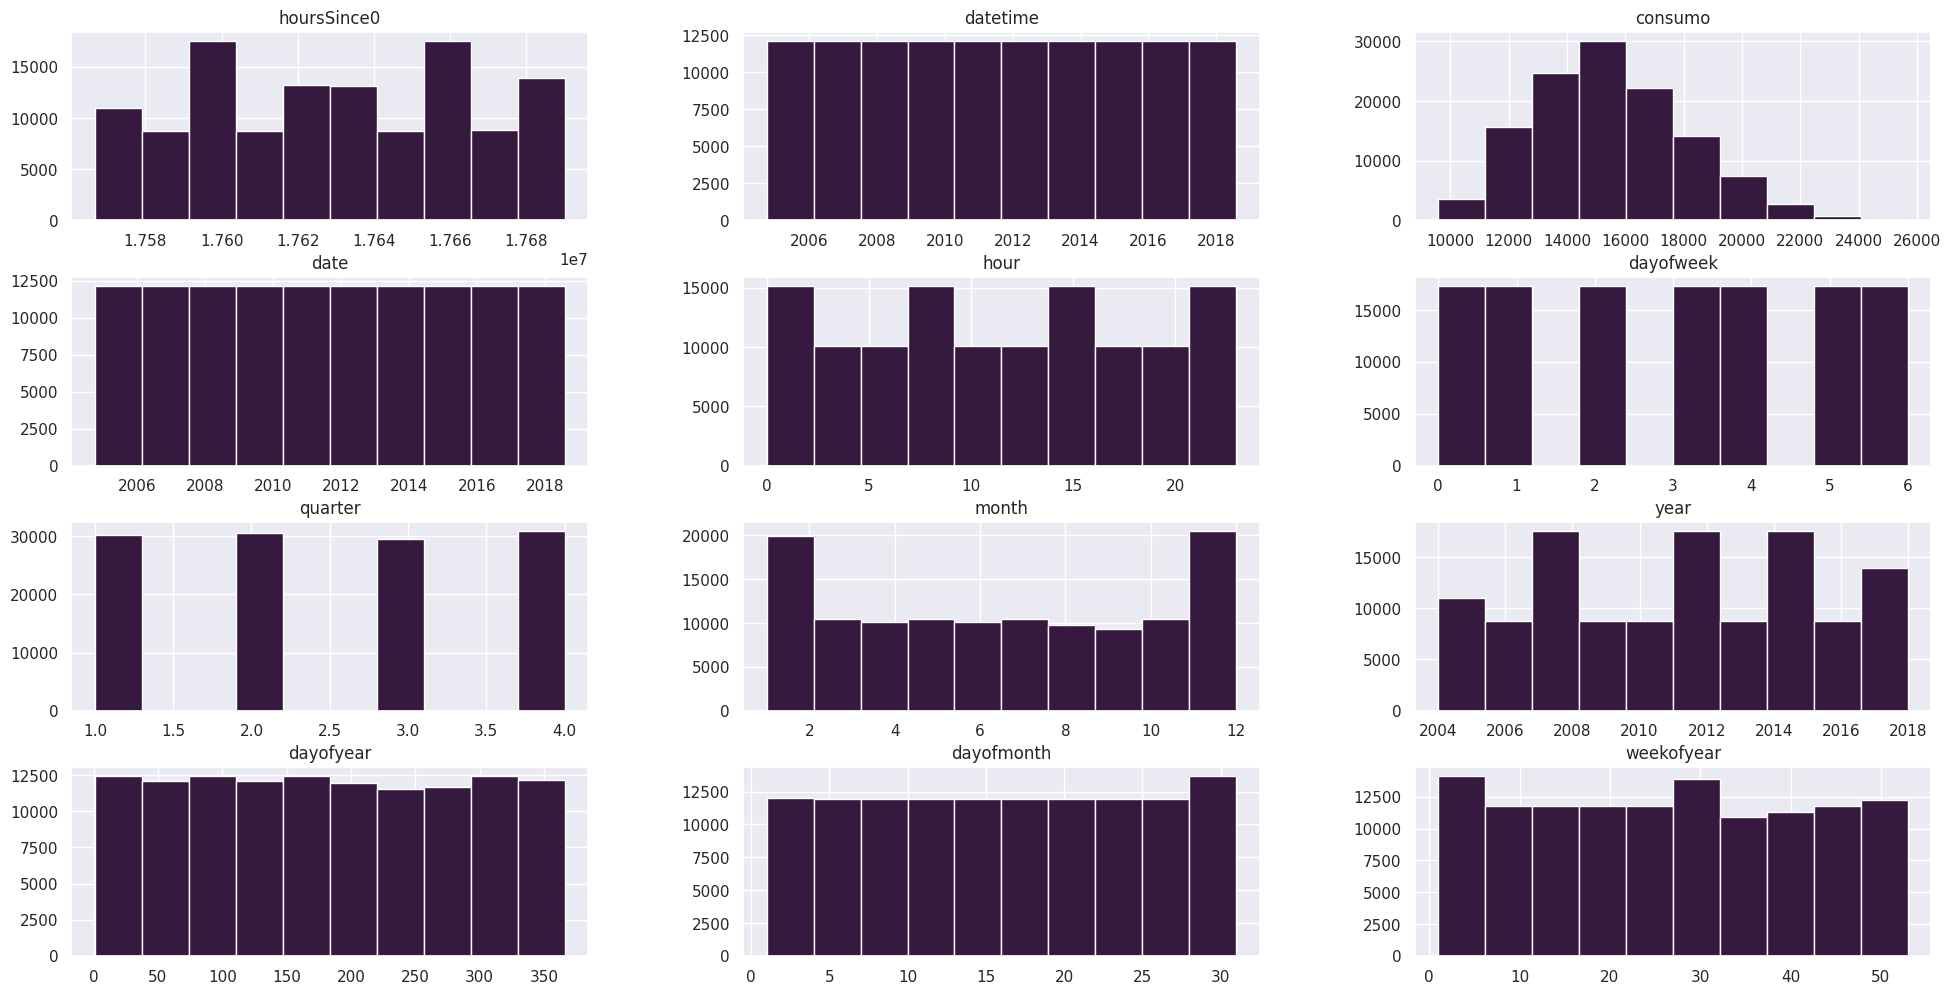

In [42]:
df1.hist();

In [50]:
def boxplot(p):
    sns.boxplot(df1, y='consumo', x=p);
    plt.title(p)
    plt.tight_layout( )
    plt.show()

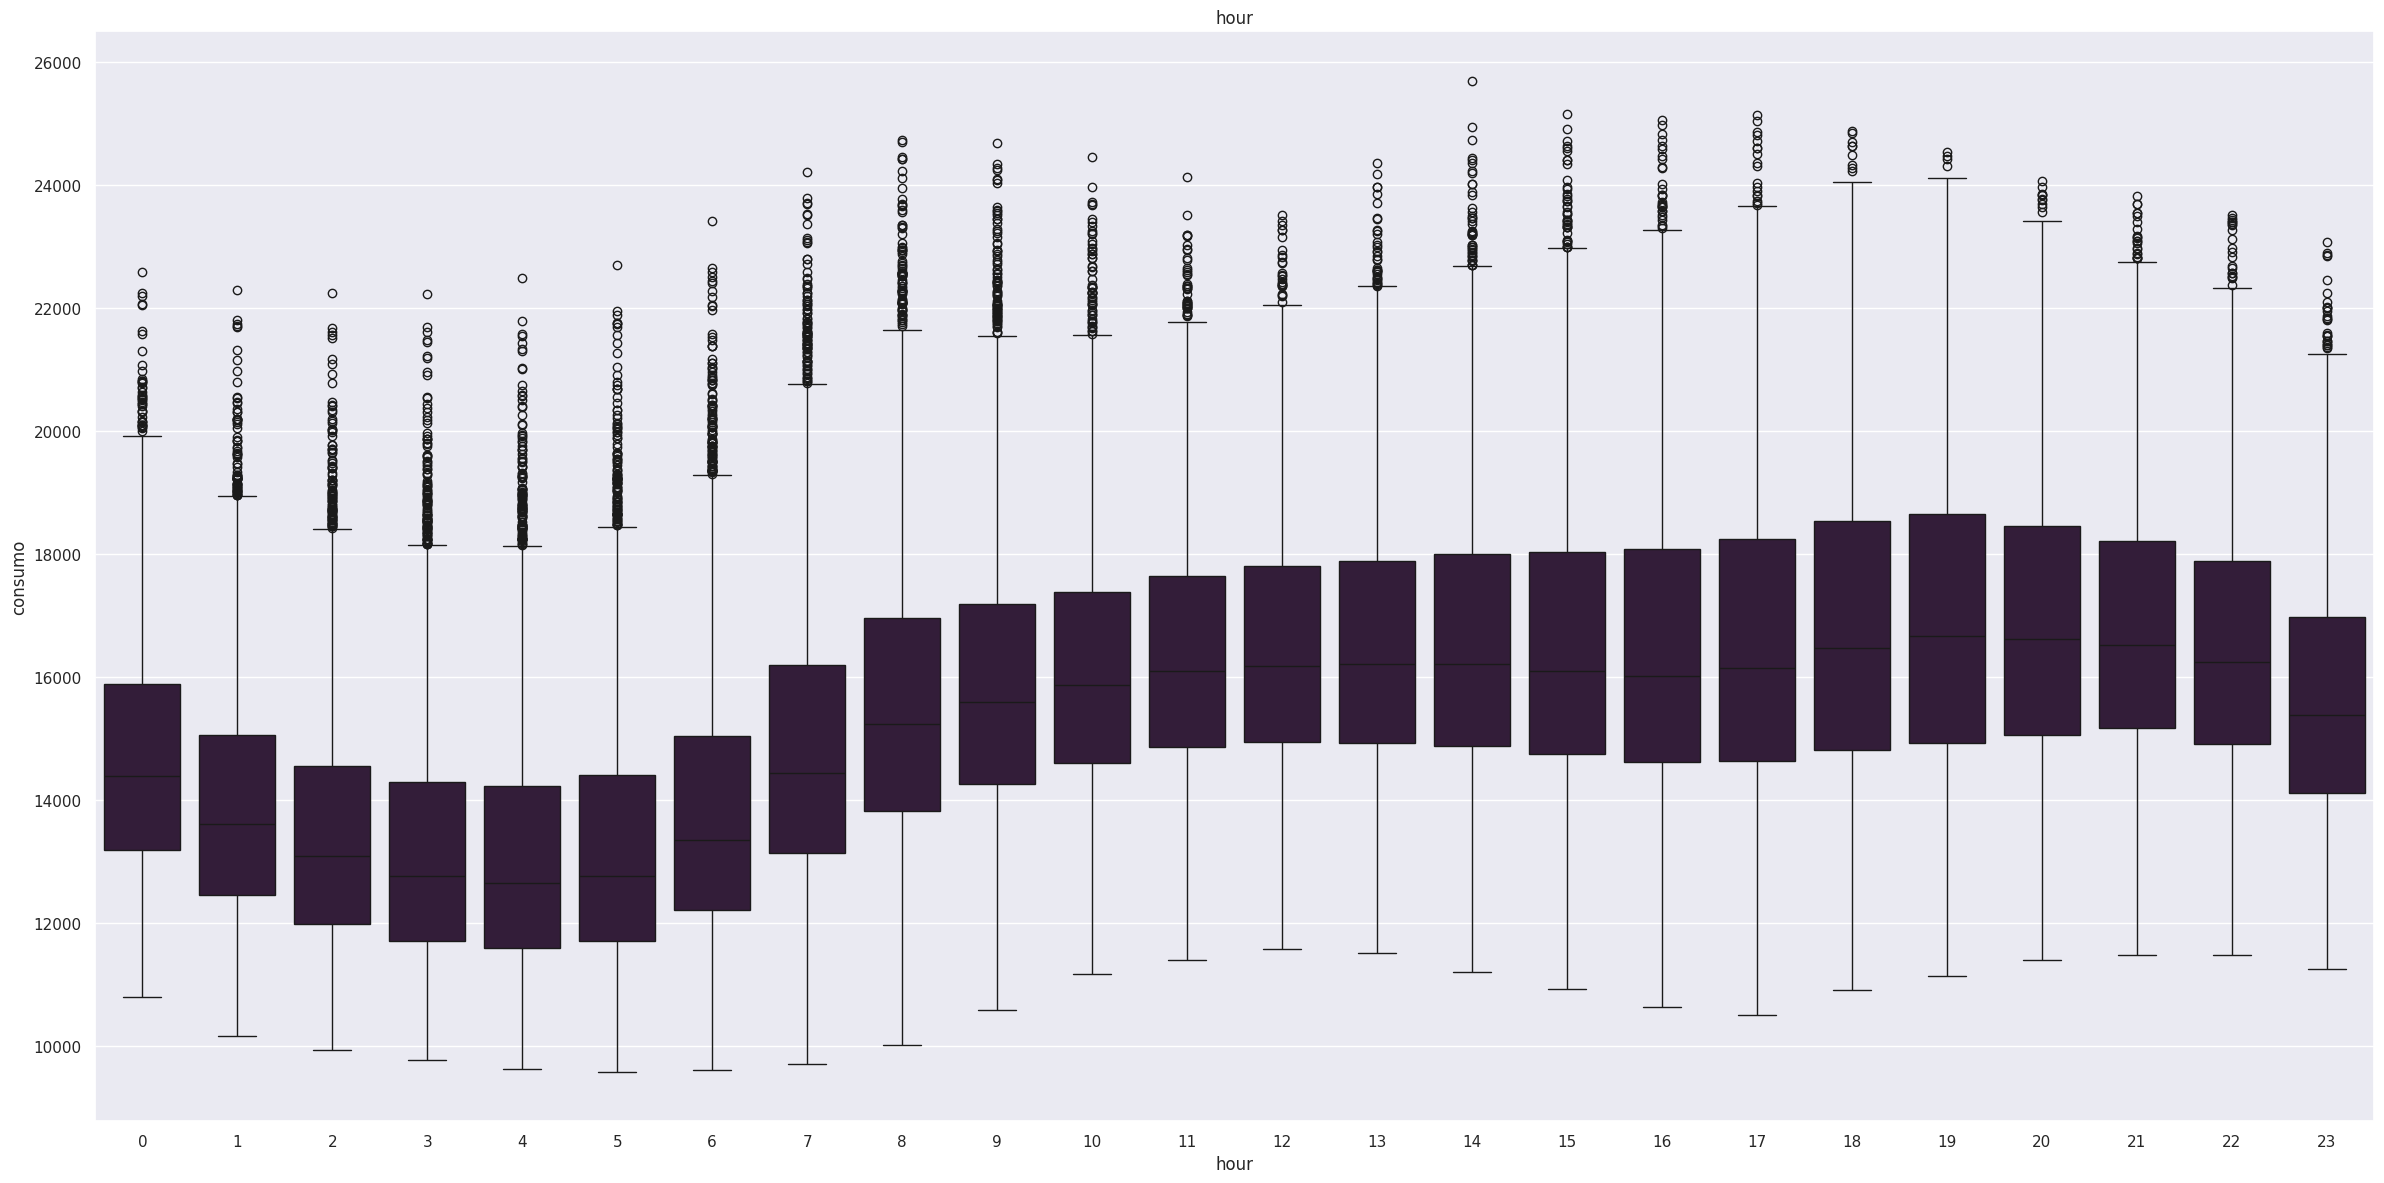

In [51]:
boxplot('hour')

* Nota-se que nas primeiras horas do dia, existe consumo menor de energia, por conta de ser madrugada, e por esse motivo se torna mais fácil a identificação de outliers.

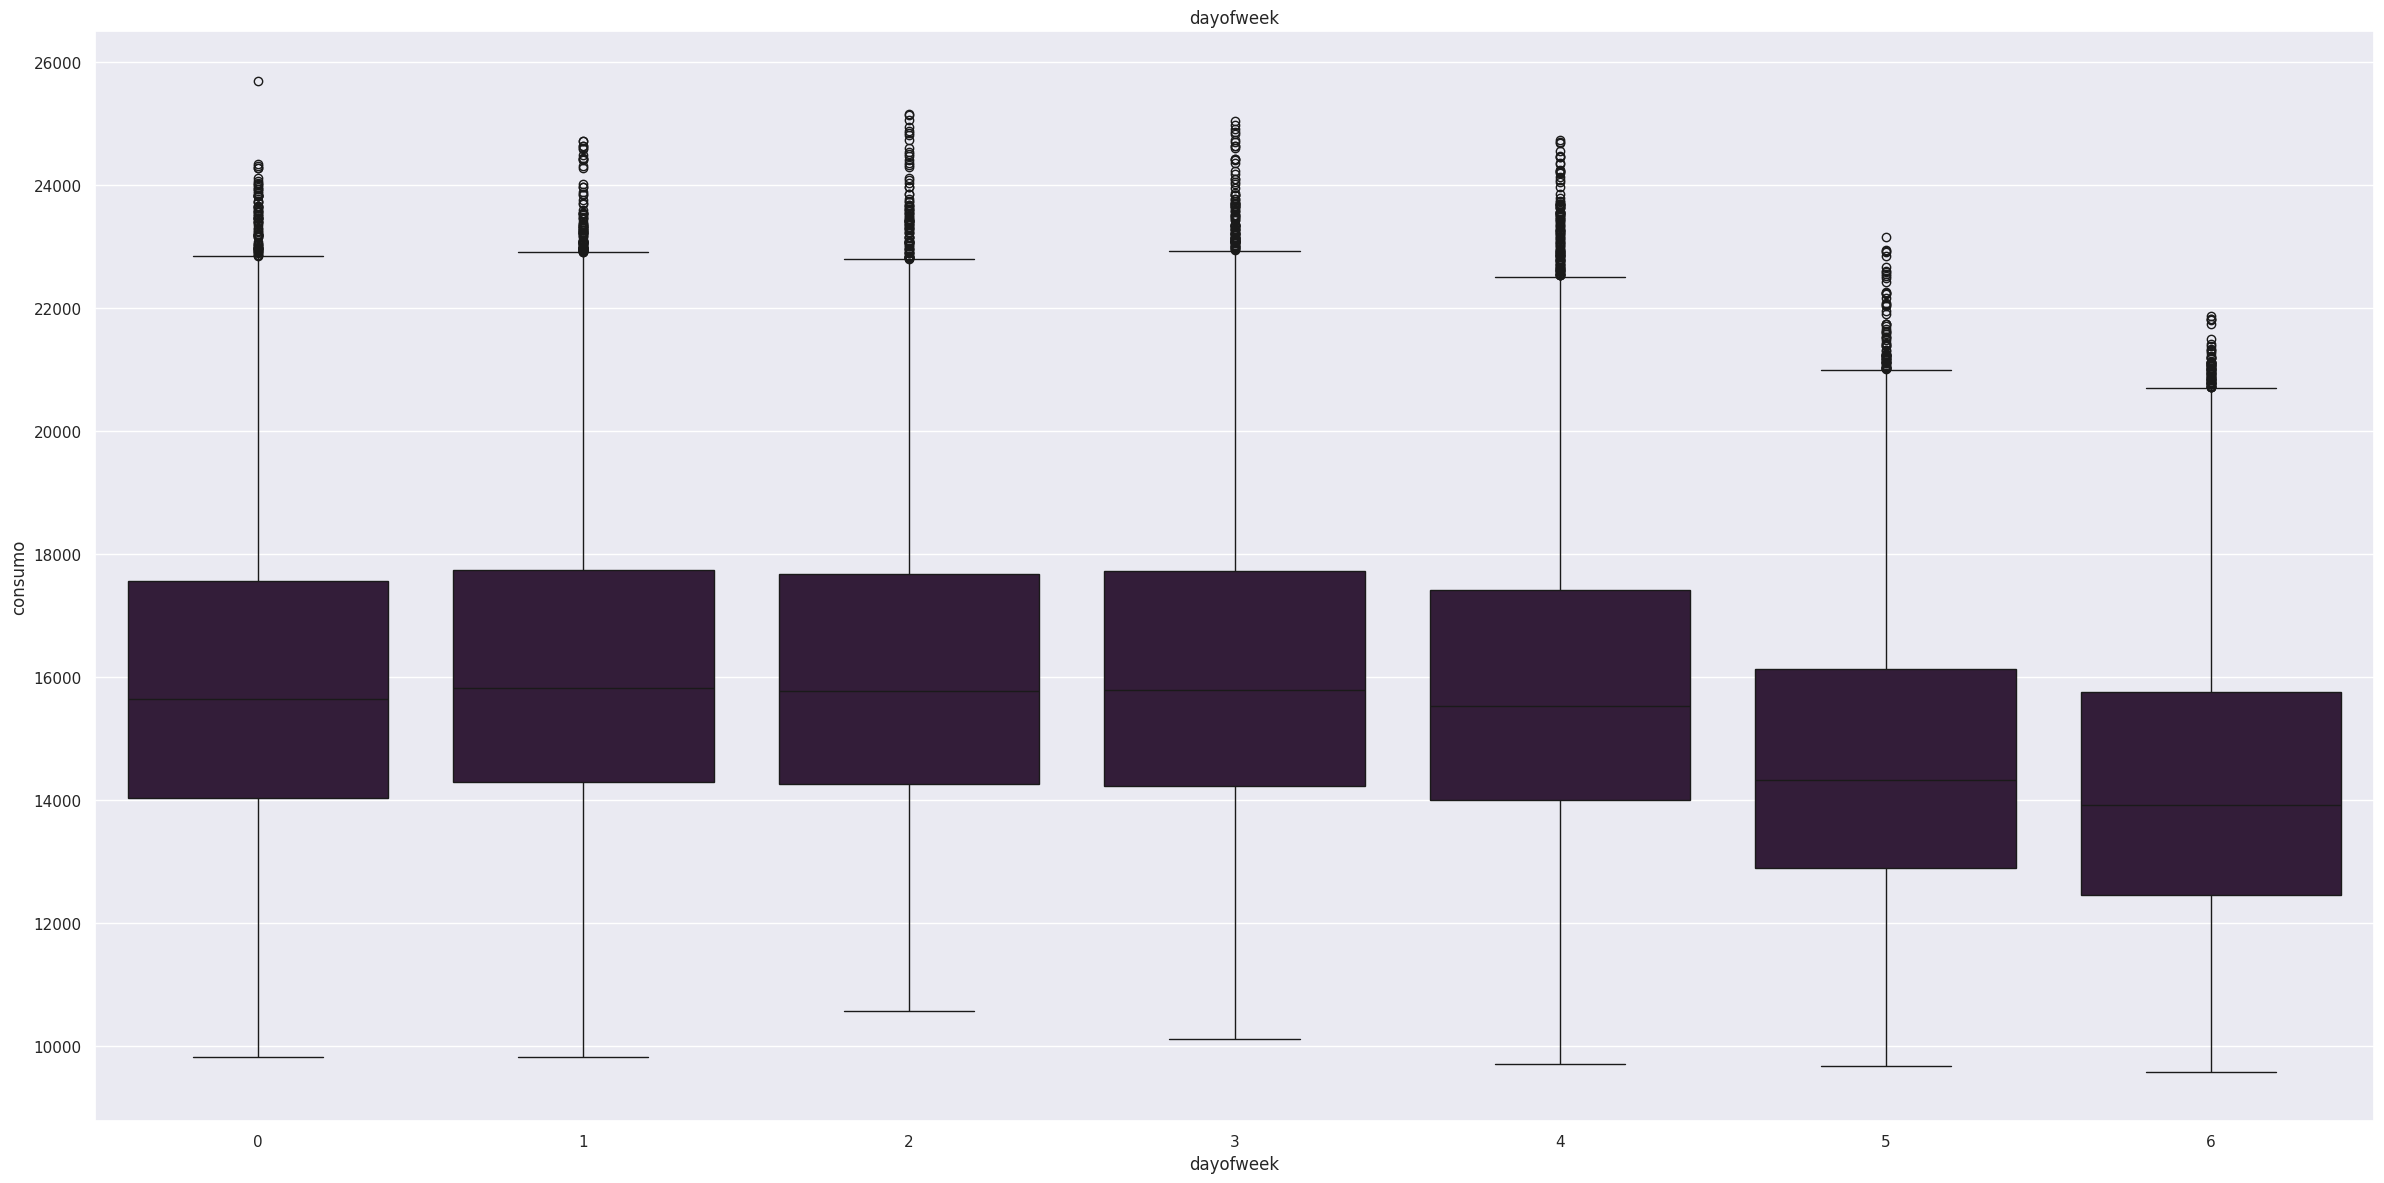

In [52]:
boxplot('dayofweek')

* Considera-se 0 como segunda feira;
* Nota-se que nos finais de semana (sabado e domingo) o consumo é menor do que nos outros dias da semana 

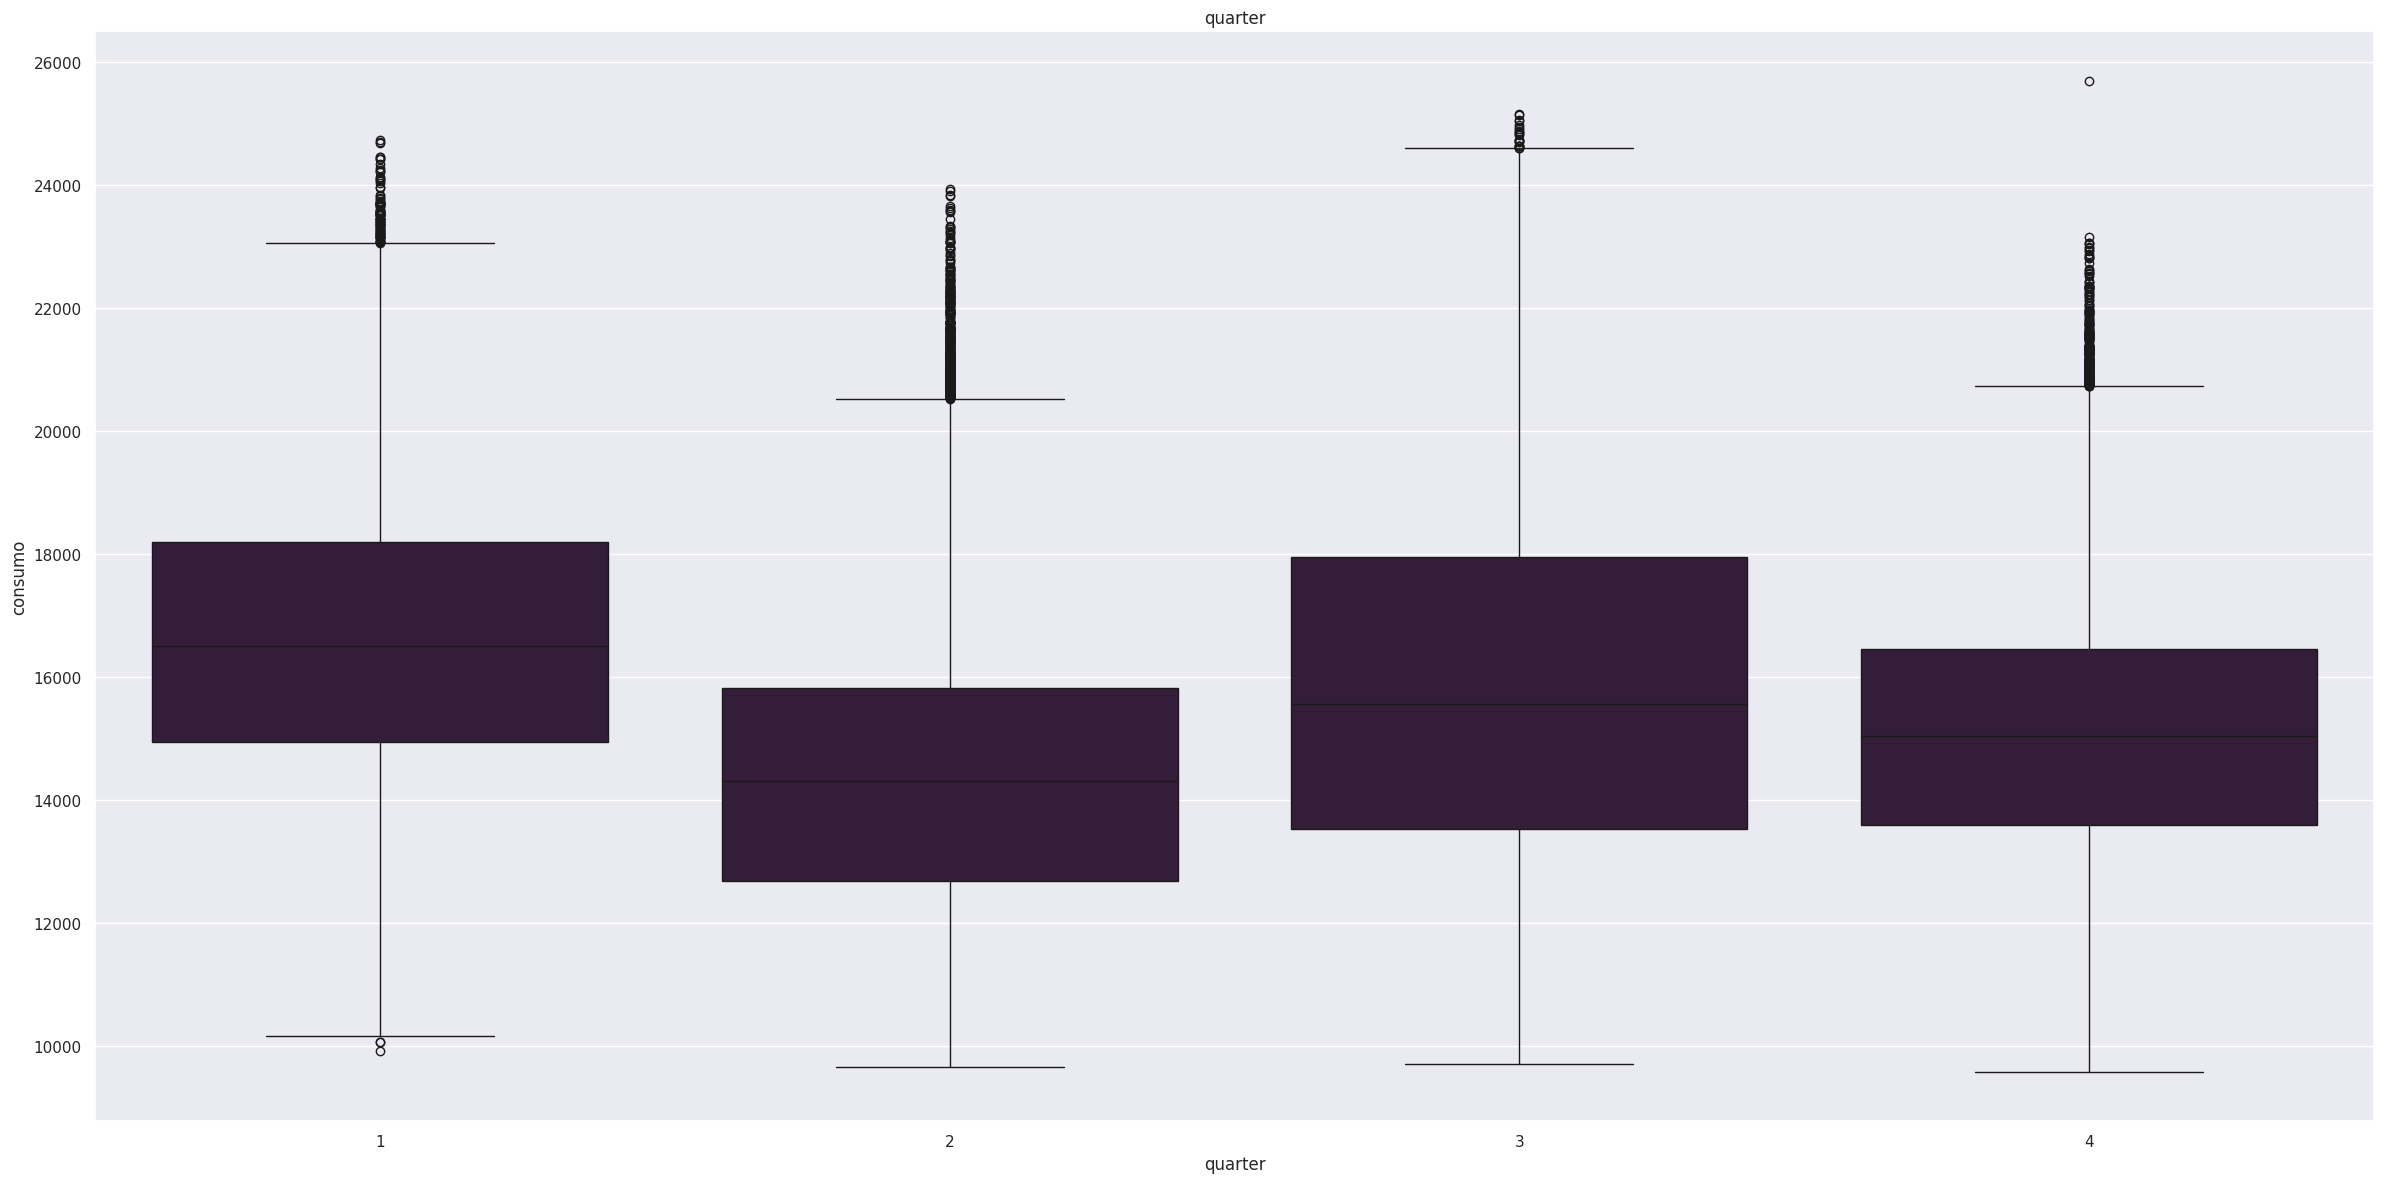

In [53]:
boxplot('quarter')

* Nota-se que nos quarters 1 e 3 o consumo é elevado e pode ser explicado pelas estações do ano (inverno e verão);
* O volume de outliers nos quarters 2 e 4 é maior, dado o menor intervalo entre os percentis 5 e 95;
* No quarter 1 existem outliers nos mínimos.


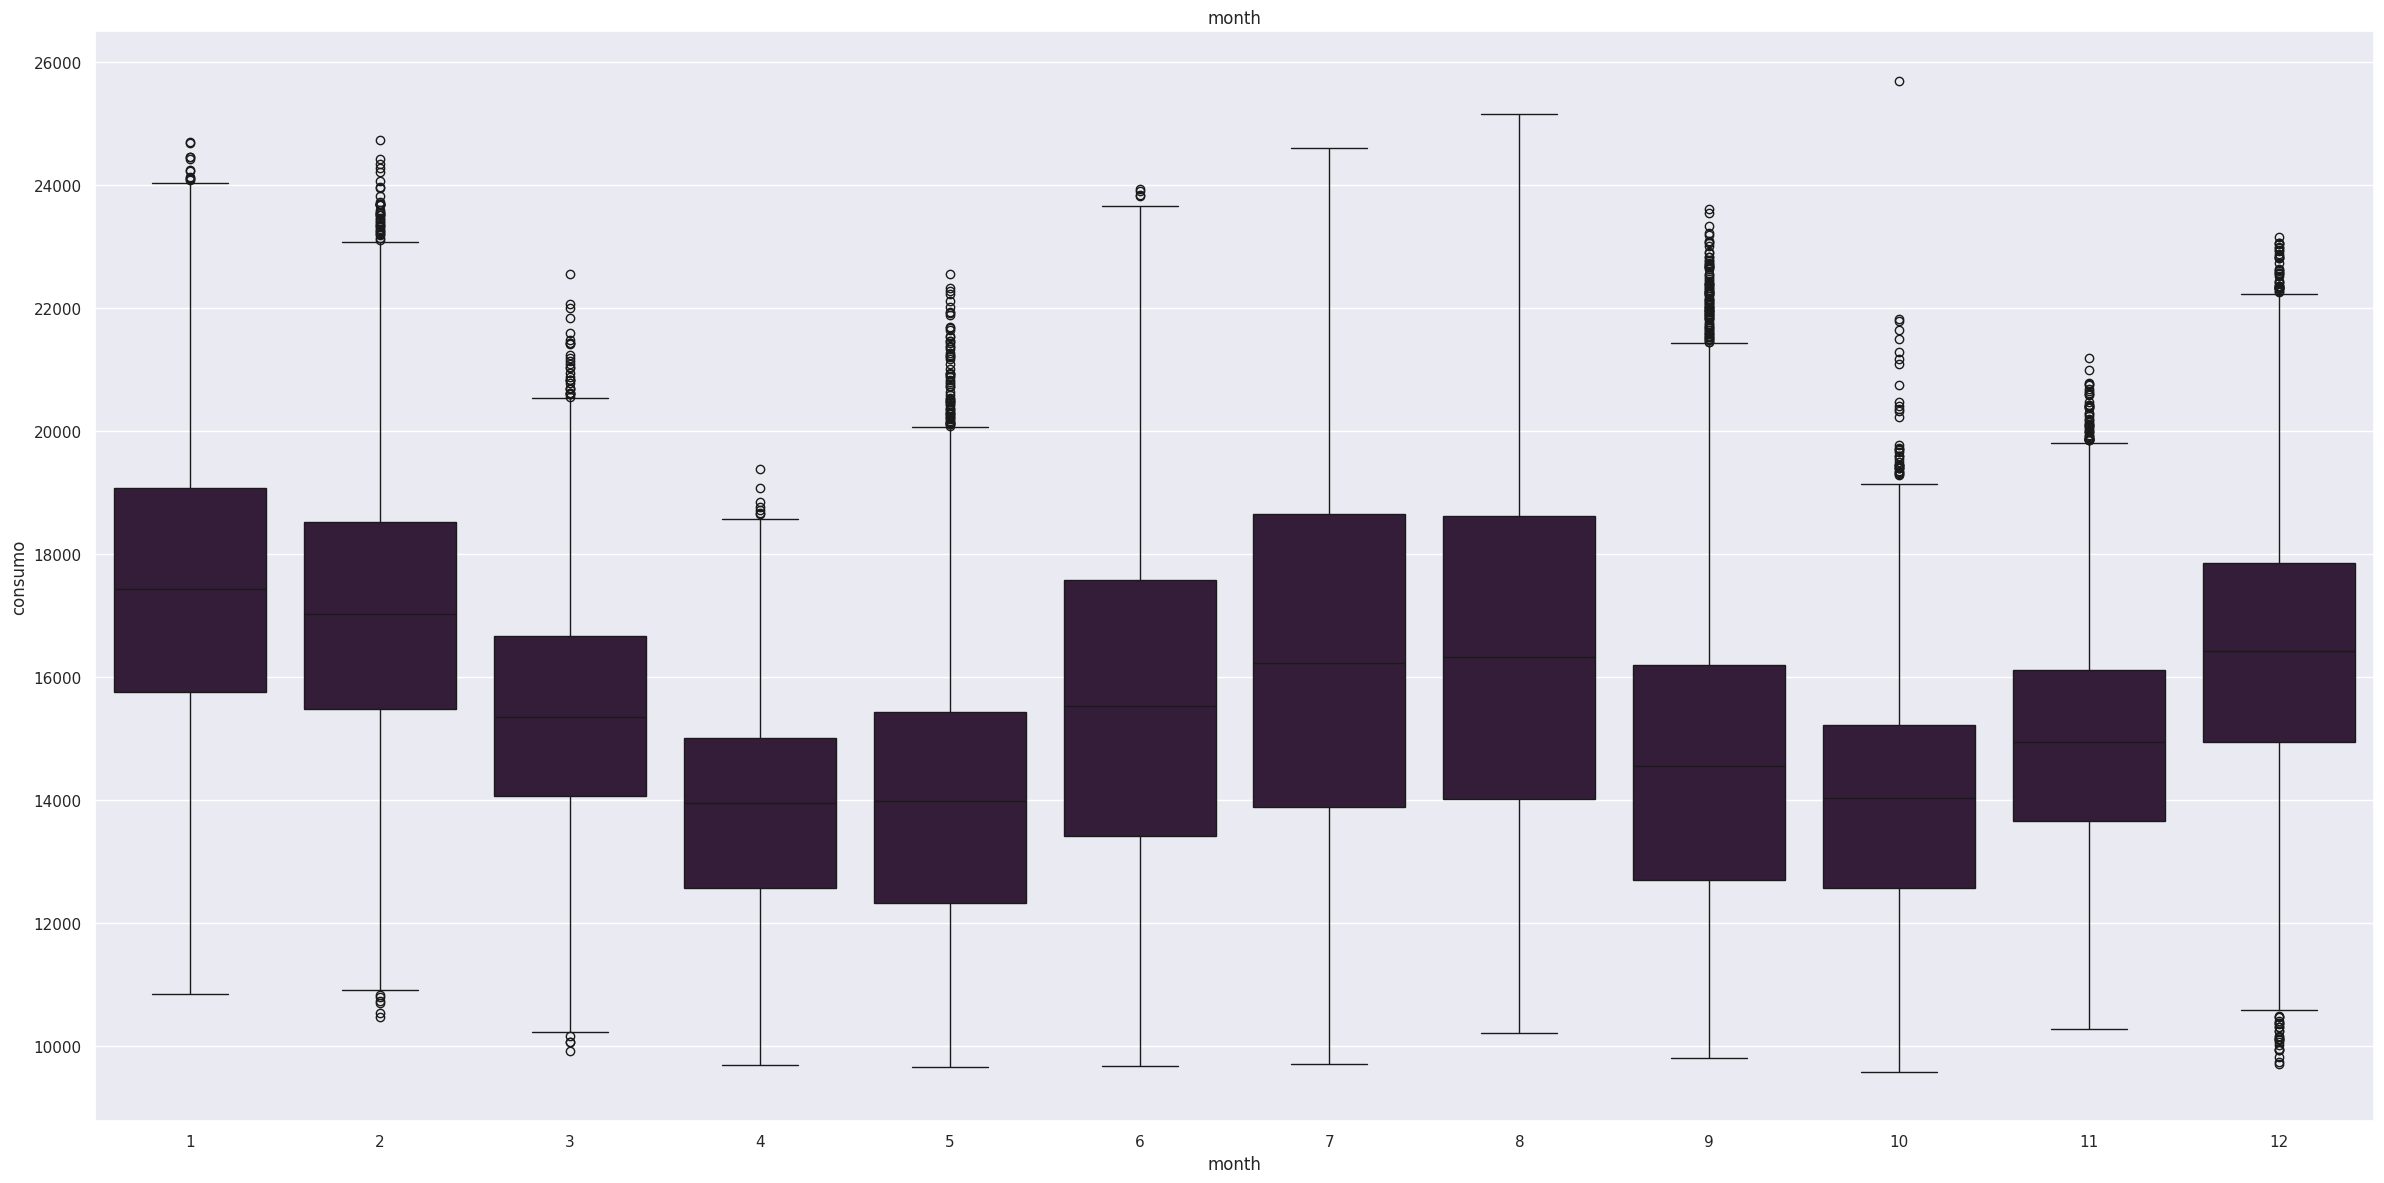

In [54]:
boxplot('month')

* Pode-se perceber um comportamento muito parecido com o quarter, porém mais detalhado;
* Em meses de inverno e verão, nota-se um consumo maior de energia, com um volume menor de outliers.

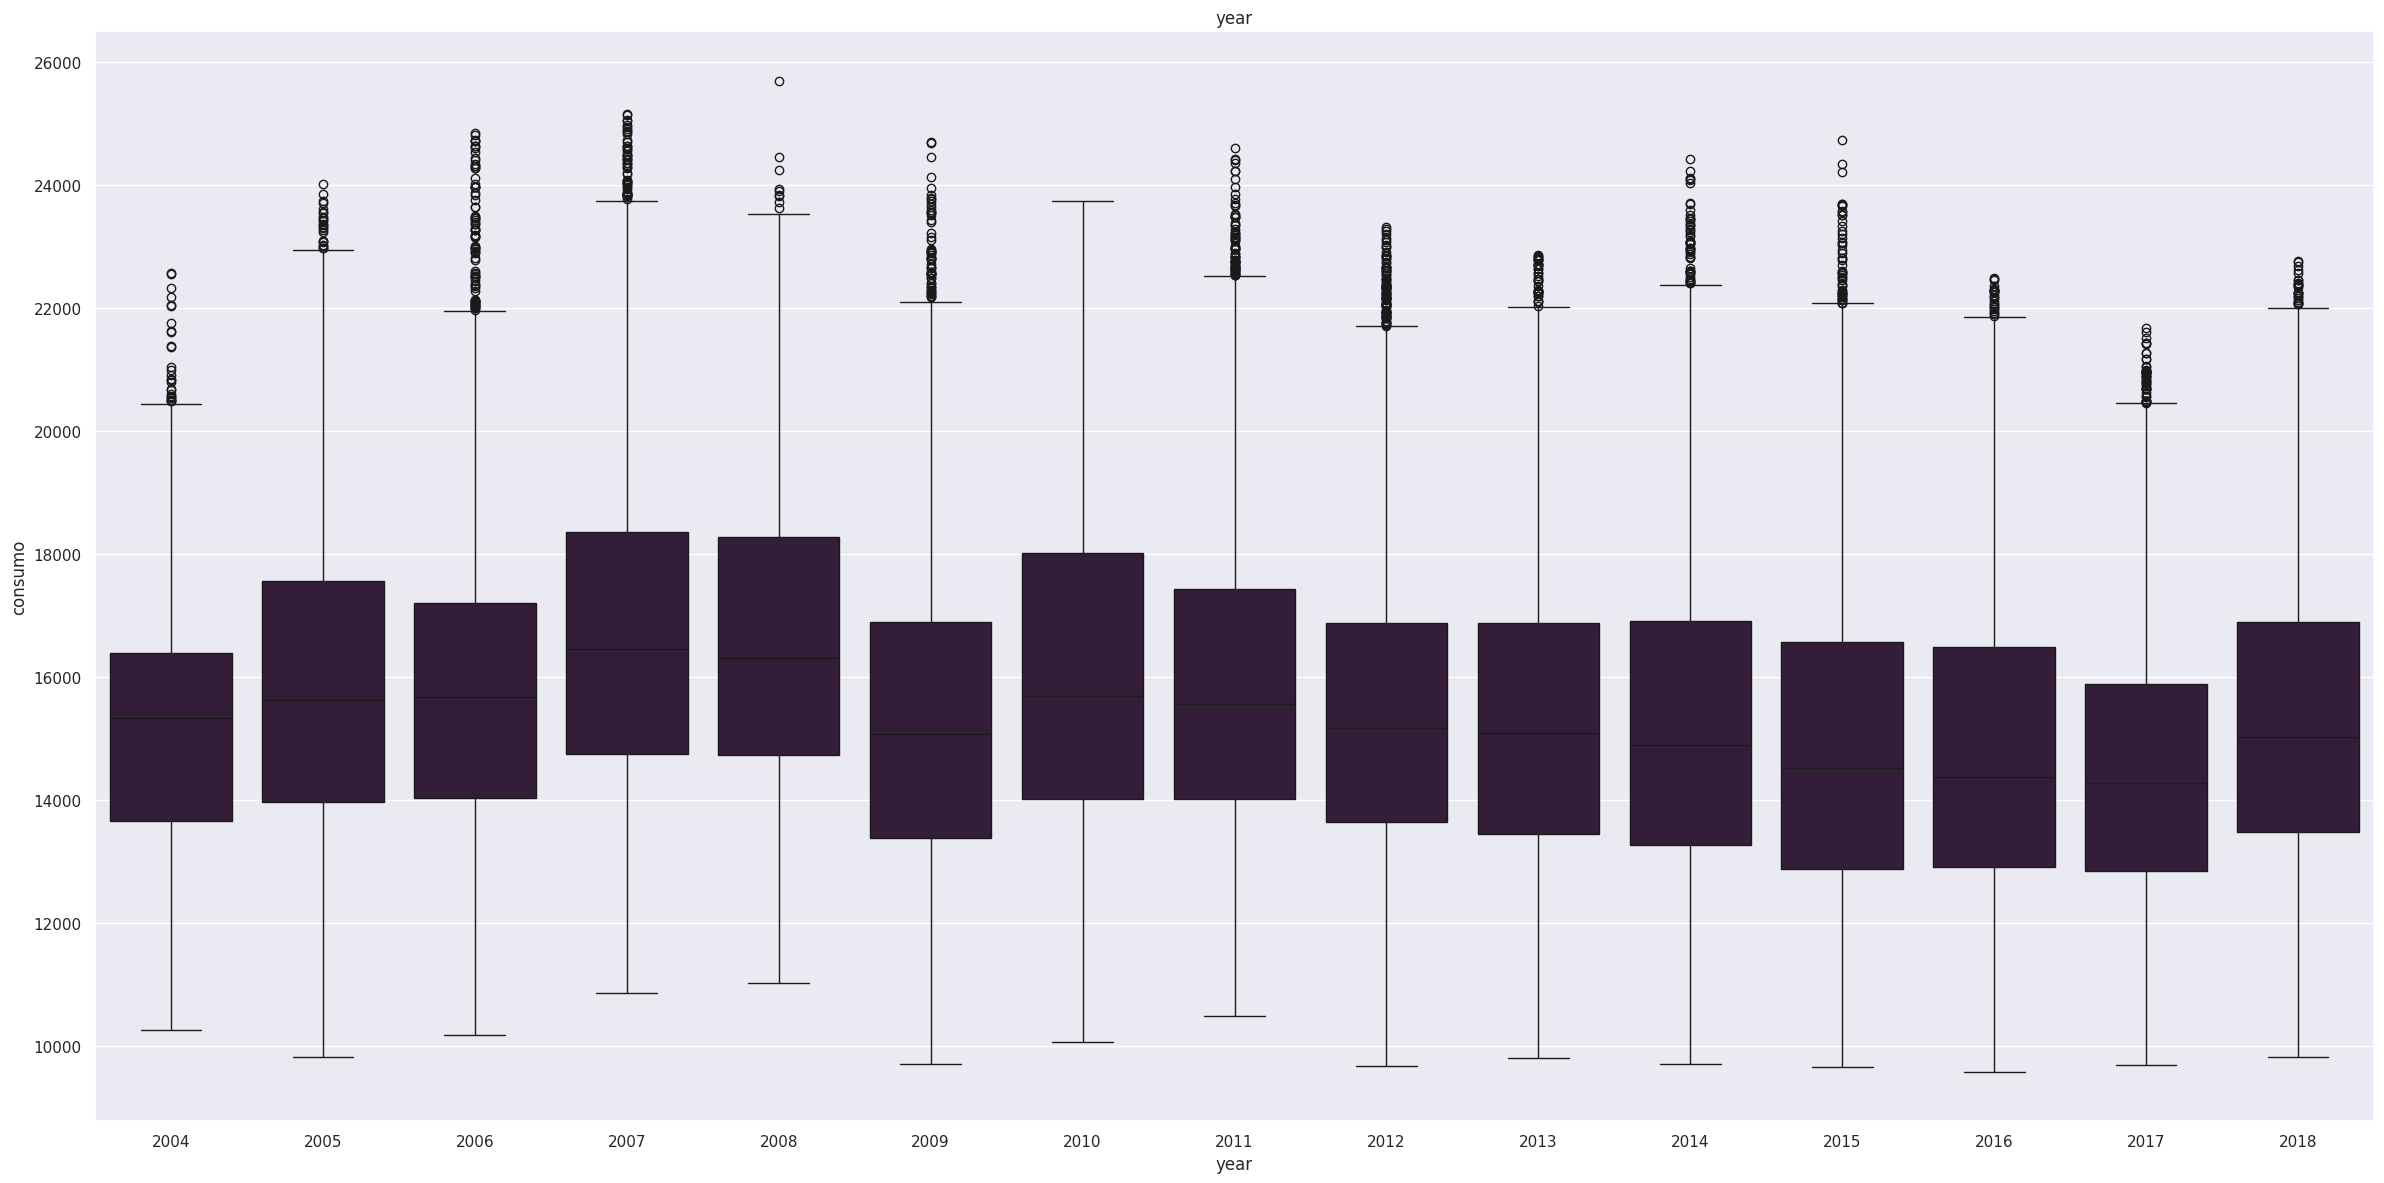

In [55]:
boxplot('year')

* Nota-se uma queda no consumo em 2009, o que pode ter acontecido por conta da crise economica;
* De 2011 em diante, com o avanço da tecnologia, embora o crescimento populacional seja intenso, o consumo tem se mantido estavel.

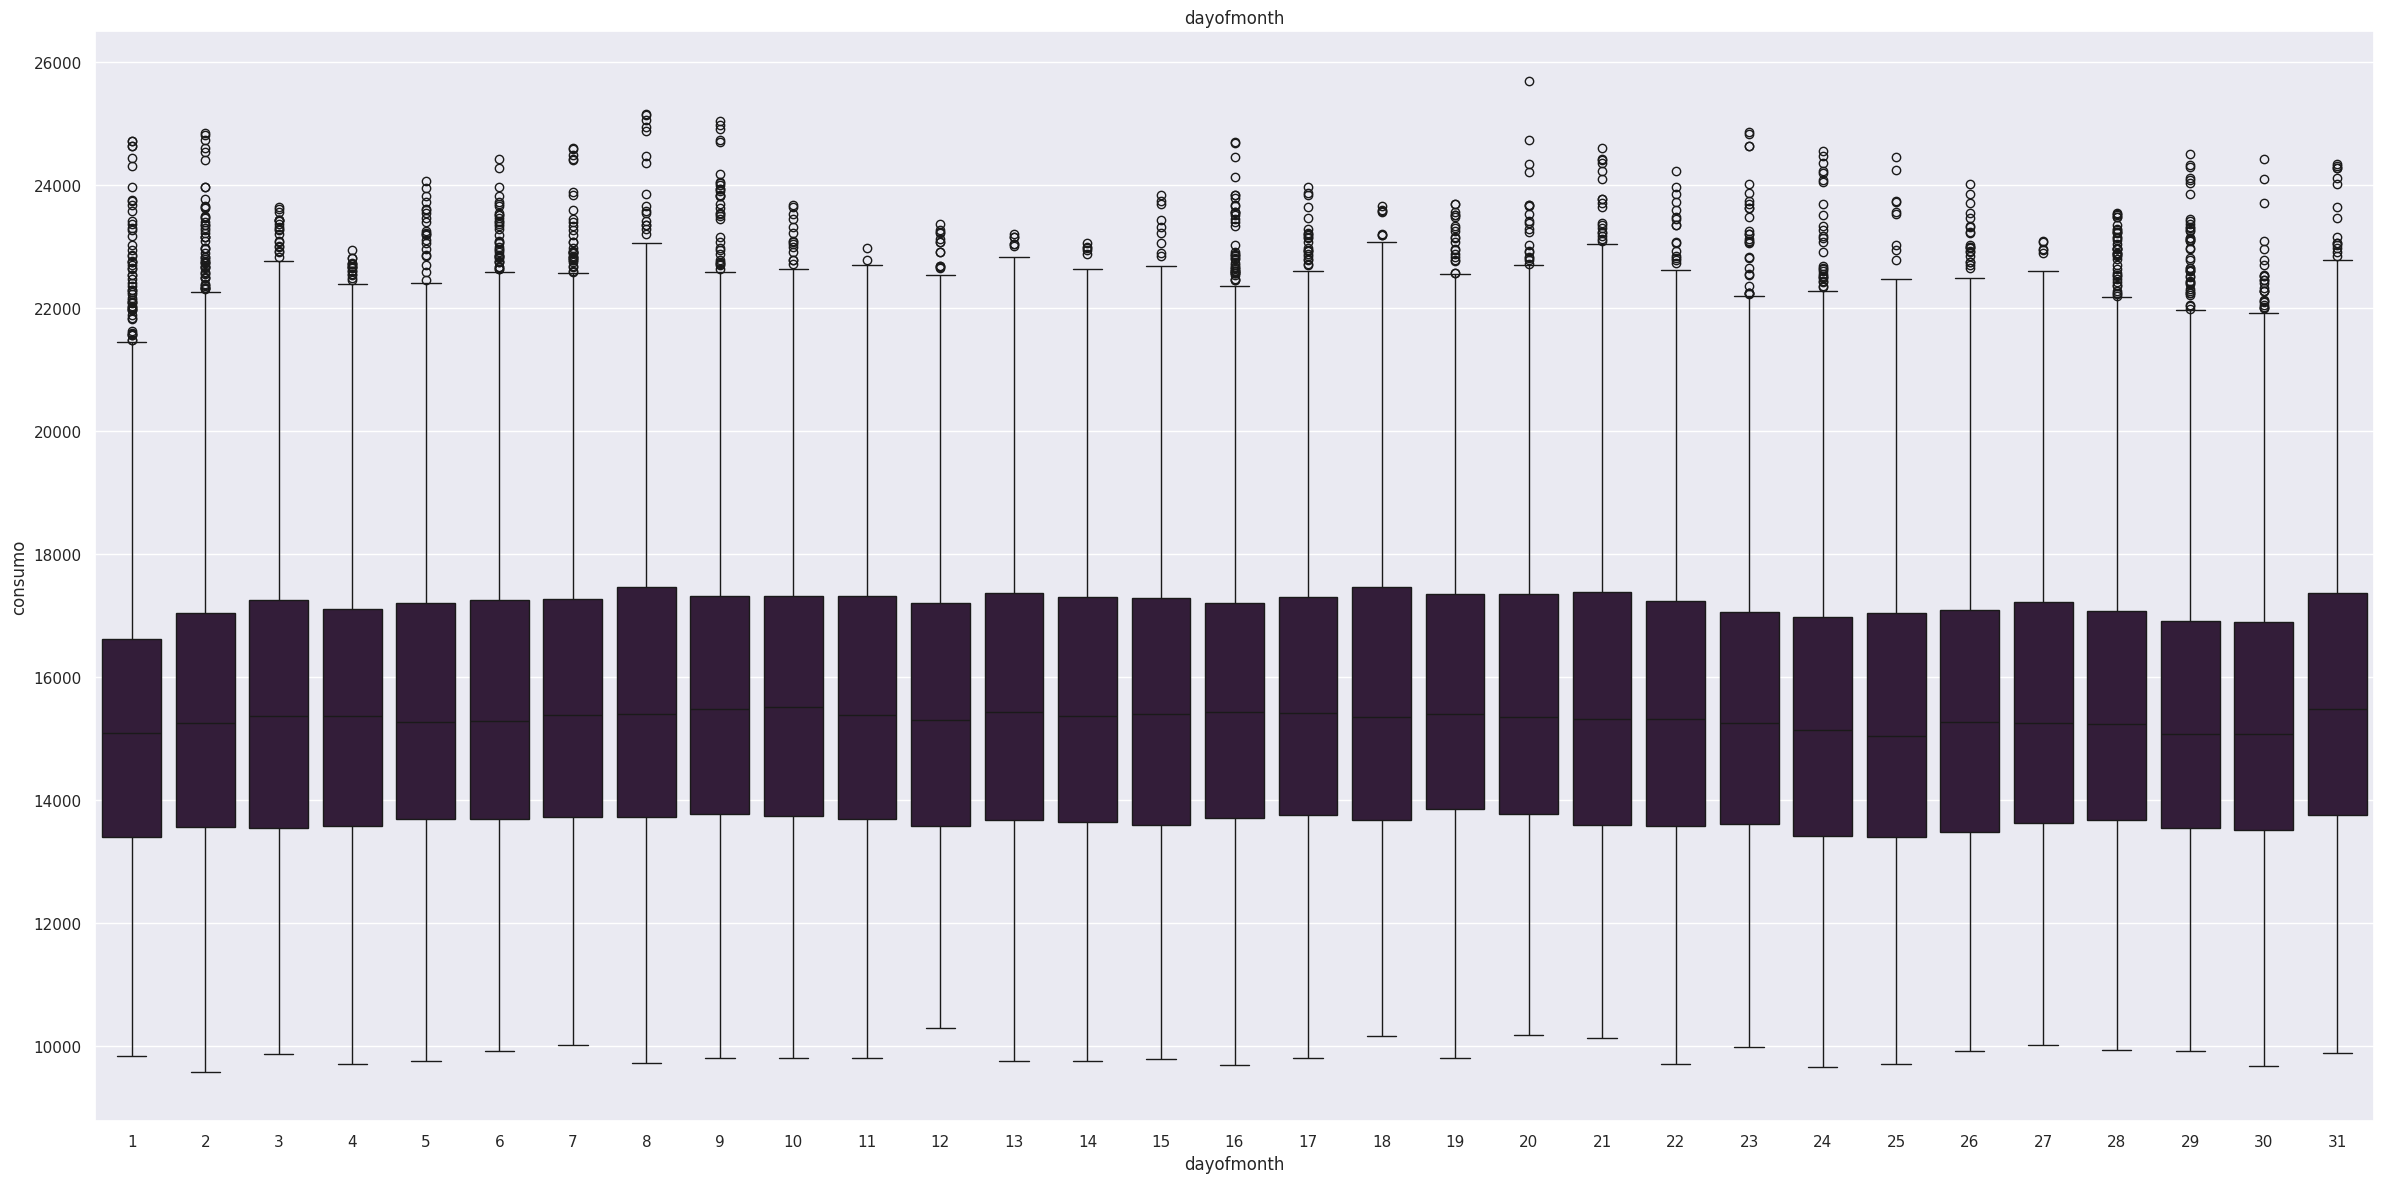

In [56]:
boxplot('dayofmonth')

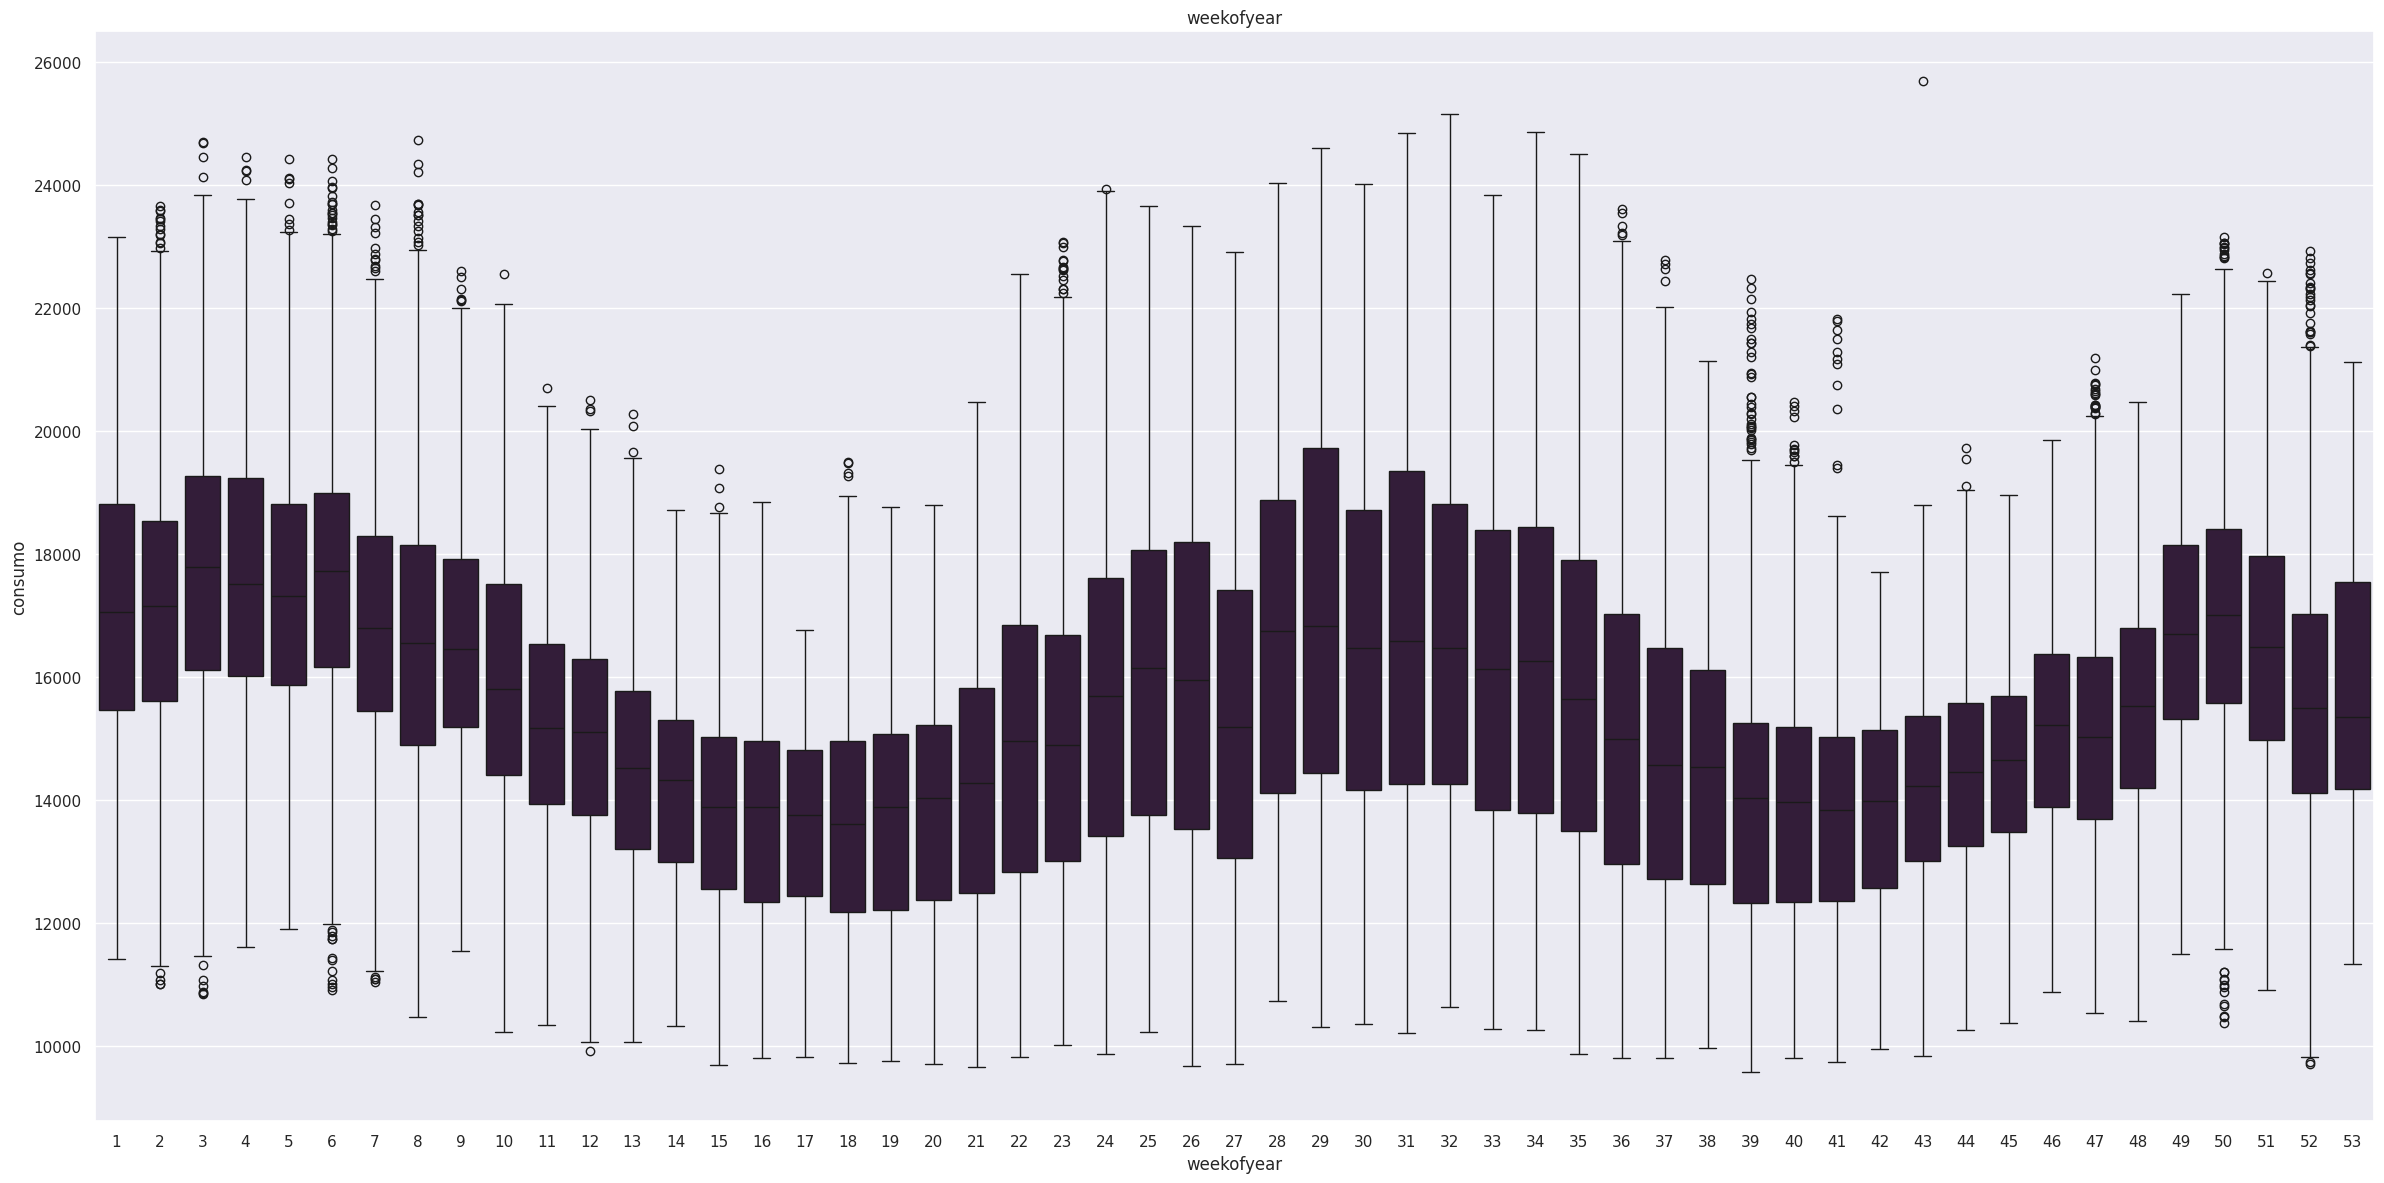

In [57]:
boxplot('weekofyear')

* Consegue-se perceber mais detalhadamente o impacto das estações do ano no consumo.

# Modeling

## Isolation Forest

In [66]:
features = ['consumo', 'hour', 'dayofweek','quarter', 'month', 
            'year', 'dayofyear', 'dayofmonth', 'weekofyear',
            'weekday', 'daylight', 'category']

In [85]:
outliers_fraction = 0.01

# Standardization
standard_scaler = preprocessing.StandardScaler()
np_scaled = standard_scaler.fit_transform(df1[features])
data = pd.DataFrame(np_scaled, columns=features)

# train isolation forest 
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data)

# add the data to the main  
df1['anomaly'] = (model.predict(data))
df1['anomaly'] = df1['anomaly'].map( {1: 0, -1: 1} )
print(df1['anomaly'].value_counts())

anomaly
0    120060
1      1213
Name: count, dtype: int64


In [79]:
df1.head()

,hoursSince0,datetime,consumo,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,daylight,category,anomaly25
0,17567434,2004-12-31 01:00:00,13478,2004-12-31,1,4,4,12,2004,366,31,53,1,0,2,0
1,17567435,2004-12-31 02:00:00,12865,2004-12-31,2,4,4,12,2004,366,31,53,1,0,2,0
2,17567436,2004-12-31 03:00:00,12577,2004-12-31,3,4,4,12,2004,366,31,53,1,0,2,0
3,17567437,2004-12-31 04:00:00,12517,2004-12-31,4,4,4,12,2004,366,31,53,1,0,2,0
4,17567438,2004-12-31 05:00:00,12670,2004-12-31,5,4,4,12,2004,366,31,53,1,0,2,0


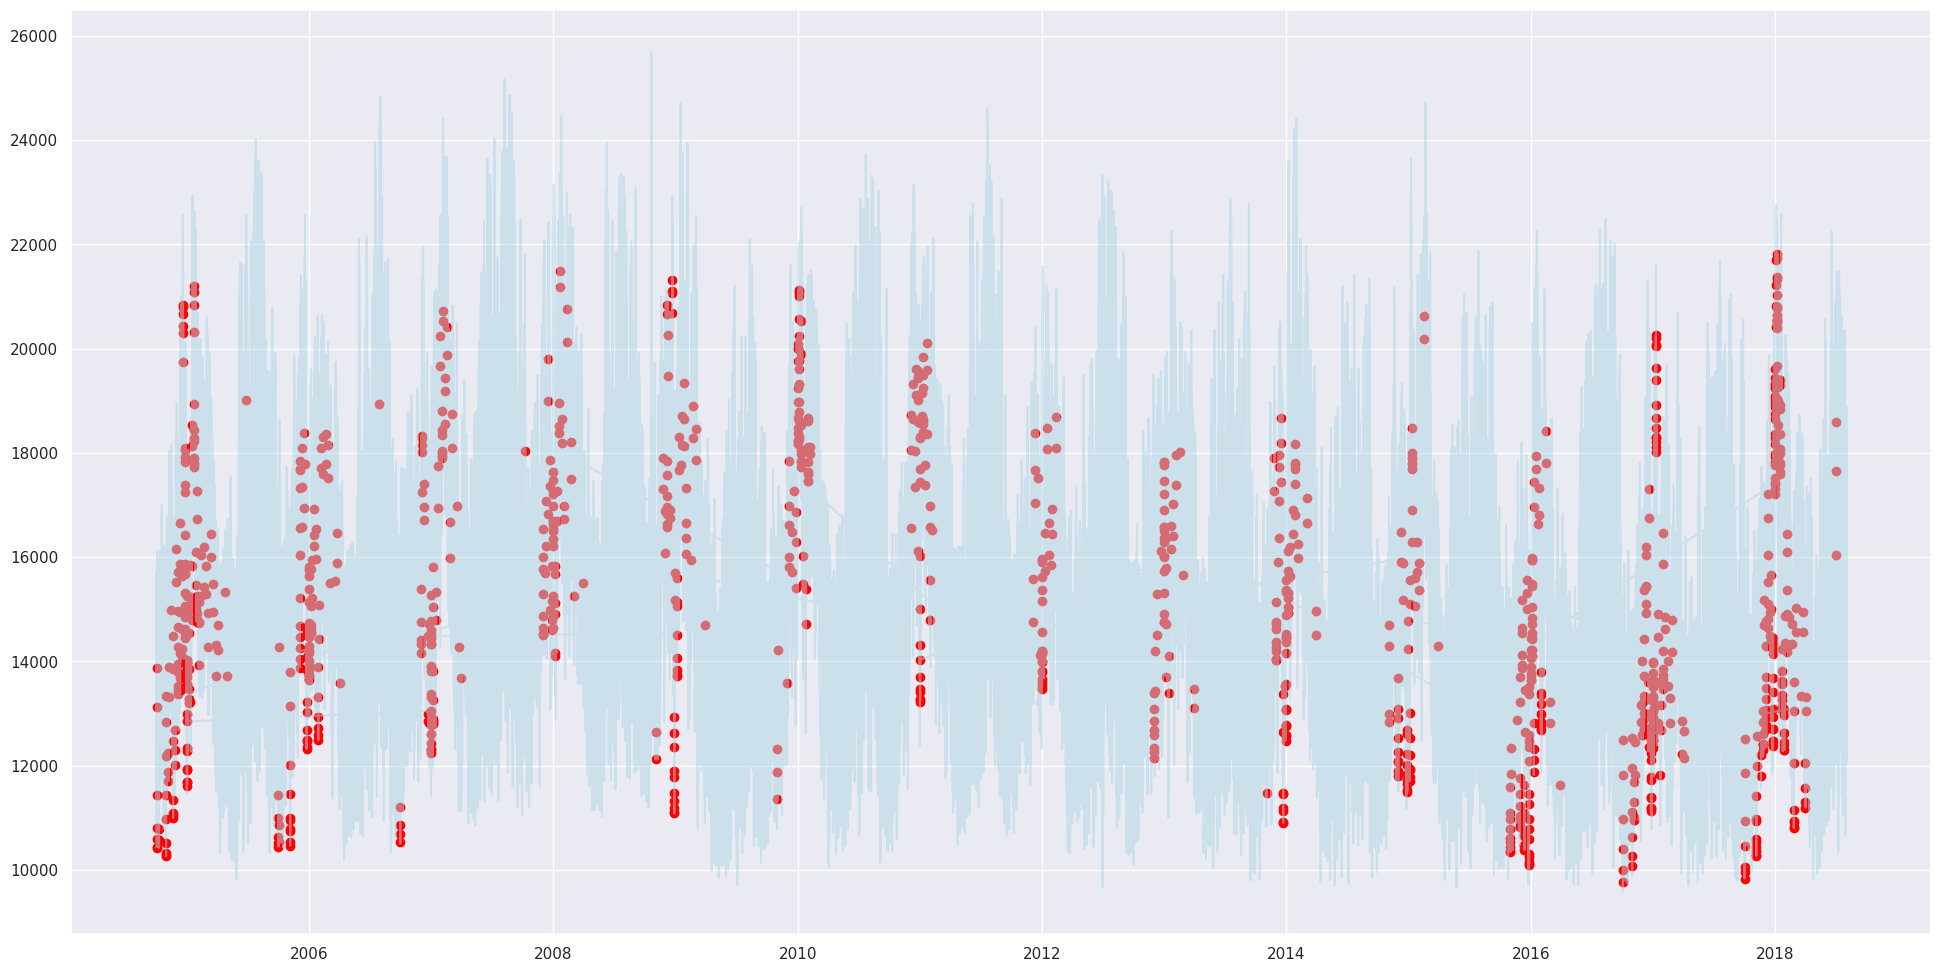

In [86]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots()

a = df1.loc[df1['anomaly'] == 1, ['datetime', 'consumo']] #anomaly

ax.scatter(a['datetime'],a['consumo'], color='red')
ax.plot(df1['datetime'], df1['consumo'], color='lightblue' , alpha=0.5)
plt.show()

In [80]:
df1.query('anomaly == 1')

,hoursSince0,datetime,consumo,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,daylight,category,anomaly25
120,17567314,2004-12-26 01:00:00,15059,2004-12-26,1,6,4,12,2004,361,26,52,0,0,0,1
141,17567335,2004-12-26 22:00:00,17834,2004-12-26,22,6,4,12,2004,361,26,52,0,0,0,1
142,17567336,2004-12-26 23:00:00,17392,2004-12-26,23,6,4,12,2004,361,26,52,0,0,0,1
167,17567313,2004-12-26 00:00:00,15676,2004-12-26,0,6,4,12,2004,361,26,52,0,0,0,1
309,17567167,2004-12-19 22:00:00,20670,2004-12-19,22,6,4,12,2004,354,19,51,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121110,17689584,2018-01-07 06:00:00,21026,2018-01-07,6,6,1,1,2018,7,7,1,0,0,0,1
121111,17689585,2018-01-07 07:00:00,21376,2018-01-07,7,6,1,1,2018,7,7,1,0,0,0,1
121126,17689600,2018-01-07 22:00:00,18531,2018-01-07,22,6,1,1,2018,7,7,1,0,0,0,1
121127,17689601,2018-01-07 23:00:00,17947,2018-01-07,23,6,1,1,2018,7,7,1,0,0,0,1


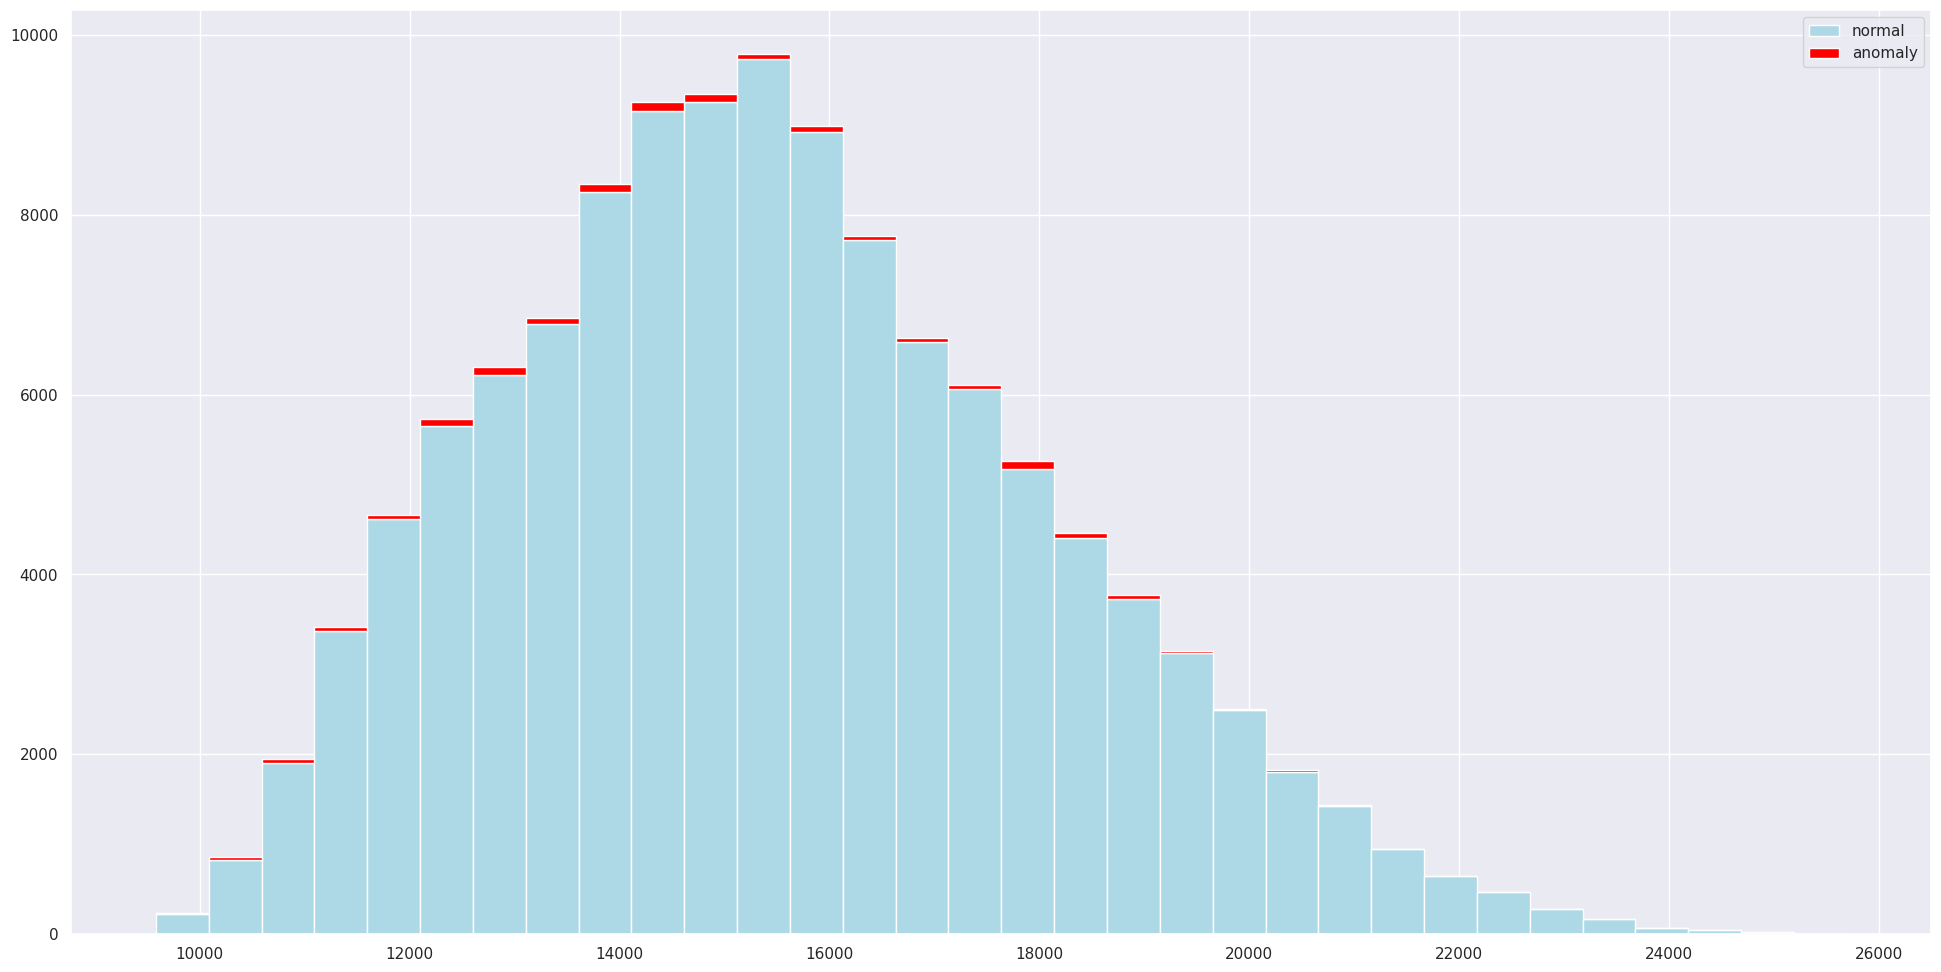

In [87]:
# visualisation of anomaly with temperature repartition (viz 2)
a = df1.loc[df1['anomaly'] == 0, 'consumo']
b = df1.loc[df1['anomaly'] == 1, 'consumo']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['lightblue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()